# Exploração de dados - Mapeamento de Criminalidade no Ceará

#### Este notebook tem como objetivo explorar os dados obtidos da Secretaria de Segurança Pública e Defesa Social (SSPDS) do estado do Ceará.
#### As fontes dizem respeito aos registros de CRIMES VIOLENTOS LETAIS E INTENCIONAIS (CVLI), e embora alguns periodos tenham sido dificeis de obter/extrair, todos foram obtidos do órgão SSPDS-CE para este estudo.

In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregar csv de 2013 à 2021
df_estudo = pd.read_csv(r'../data/processed/dt_estudo.csv')

In [3]:
# Formatar o tipo data
df_estudo['data'] = pd.to_datetime(df_estudo['data'], format="%Y-%m-%d")

# Adicionar coluna formatada de vitimas por sexo
df_estudo['vitimas_homem']  = np.where(df_estudo['sexo_vitima'] == 'MASCULINO', 1, 0)
df_estudo['vitimas_mulher'] = np.where(df_estudo['sexo_vitima'] == 'FEMININO', 1, 0)

# Separar o código do AIS para testes
df_estudo['id_ais'] = df_estudo['ais'].str[4:].astype(int)

df_estudo[:3]

,ais,municipio,arma_utilizada,natureza_fato,data,sexo_vitima,idade_vitima,id_base,dummy_contagem,vitimas_homem,vitimas_mulher,id_ais
0,AIS 17,Apuiarés,Arma branca,HOMICIDIO DOLOSO,2017-12-10,FEMININO,20,1,1,0,1,17
1,AIS 14,São Benedito,Outros meios,HOMICIDIO DOLOSO,2017-12-11,FEMININO,45,1,1,0,1,14
2,AIS 16,Catunda,Outros meios,HOMICIDIO DOLOSO,2017-12-12,FEMININO,16,1,1,0,1,16


### Agrupar ocorrências por mês
Ocorrências sumarizadas por mês ao longo do tempo, e maiores vítimas.

> As maiores vítimas são homens, e existe um gap de coleta de dados de 2020, entre os meses março à dezembro, das bases extraídas

In [4]:
# Agrupar por mês em novo Dataframe
agrupamento_mes = df_estudo.resample('M', on='data')

df_periodo_m = pd.DataFrame()
df_periodo_m['total_vitimas'] = agrupamento_mes['dummy_contagem'].count()
df_periodo_m['total_vitimas_homem']  = agrupamento_mes['vitimas_homem'].sum()
df_periodo_m['total_vitimas_mulher'] = agrupamento_mes['vitimas_mulher'].sum()
df_periodo_m['mediana_idade'] = agrupamento_mes['idade_vitima'].median()

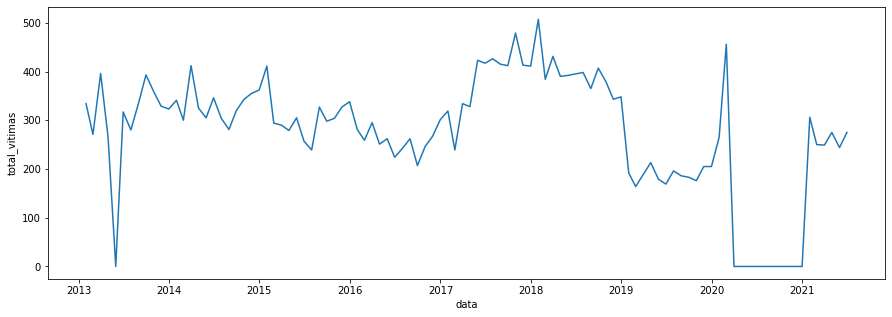

In [5]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df_periodo_m,
            x = 'data',
            y = 'total_vitimas'
            )
plt.show()

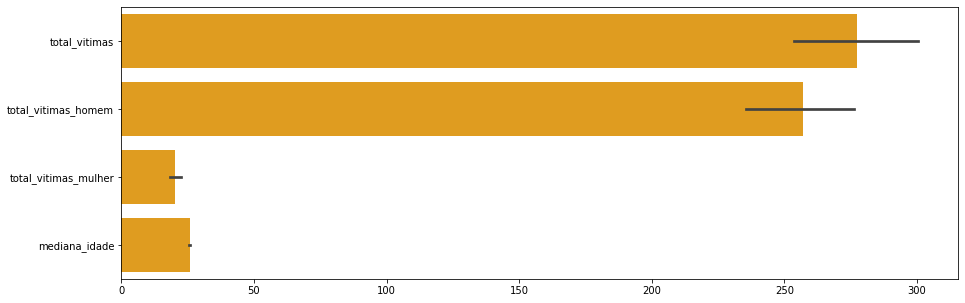

In [6]:
plt.figure(figsize=(15,5))
sns.barplot(data=df_periodo_m, color='orange', orient='h')
plt.show()

### Agrupar ocorrências por natureza do fato
Mostrar o volume de ocorrências por natureza do fato

> A principal natureza do óbito é de Homicídio Doloso

In [7]:
# Agrupar por natureza
agrupamento_natureza = pd.DataFrame([ df_estudo.groupby(['natureza_fato']).size() ])
agrupamento_natureza

natureza_fato,FEMINICÍDIO,HOMICIDIO DOLOSO,HOMICÍDIO DECORRENTE DE OPOSIÇÃO À INTERVENÇÃO POLICIAL,LESAO CORPORAL SEGUIDA DE MORTE,ROUBO SEGUIDO DE MORTE (LATROCINIO)
0,77,27854,153,81,129


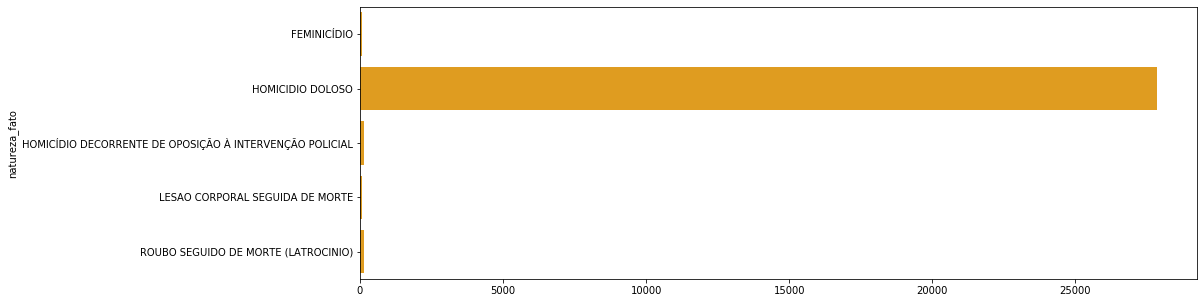

In [8]:
plt.figure(figsize=(15,5))
sns.barplot(data=agrupamento_natureza, color='orange', orient='h',)
plt.show()

### Agrupar ocorrências por município
Tentativa de encontrar desvio padrão de ocorrências por município de maior gravidade

In [9]:
# Agrupar por município
agrupamento_municipio = pd.DataFrame([ df_estudo.groupby(['municipio']).size() ])
agrupamento_municipio

municipio,Abaiara,Acarape,Acaraú,Acopiara,Aiuaba,Alcântaras,Altaneira,Alto Santo,Amontada,Antonina do Norte,...,Trairi,Tururu,Ubajara,Umari,Umirim,Uruburetama,Uruoca,Varjota,Viçosa do Ceará,Várzea Alegre
0,11,58,89,125,21,4,5,41,61,8,...,157,25,49,4,48,38,14,57,52,36


In [10]:
# plt.figure(figsize=(15,5))
# sns.barplot(data=agrupamento_municipio, color='blue', orient='h',)
# plt.show()

### Matriz de correlação
Exigir grau de correlação das variáveis numéricas montadas

In [11]:
df_estudo.corr()

,idade_vitima,id_base,dummy_contagem,vitimas_homem,vitimas_mulher,id_ais
idade_vitima,1.000000,0.014894,NaN,-0.019006,0.019270,0.165574
id_base,0.014894,1.000000,NaN,-0.054960,0.054847,0.078684
dummy_contagem,NaN,NaN,NaN,NaN,NaN,NaN
vitimas_homem,-0.019006,-0.054960,NaN,1.000000,-0.999481,-0.002650
vitimas_mulher,0.019270,0.054847,NaN,-0.999481,1.000000,0.002436
id_ais,0.165574,0.078684,NaN,-0.002650,0.002436,1.000000
